In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from IPython import display
from wordcloud import WordCloud
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


# Read Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/upwork/salaries_cyber.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [ ]:
styles = [dict(selector="caption", props=[("font-size", "120%"),
                                          ("font-weight", "bold"),("background-color", "cyan"),("color","black"),("text-align","center")])]
# displaying the DataFrame holiday_event
display.display(df.head(6).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()                                  
.set_caption('holiday event dataset & summary').set_table_styles(styles))
df.info()

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


# Data Visualization

## WordCloud

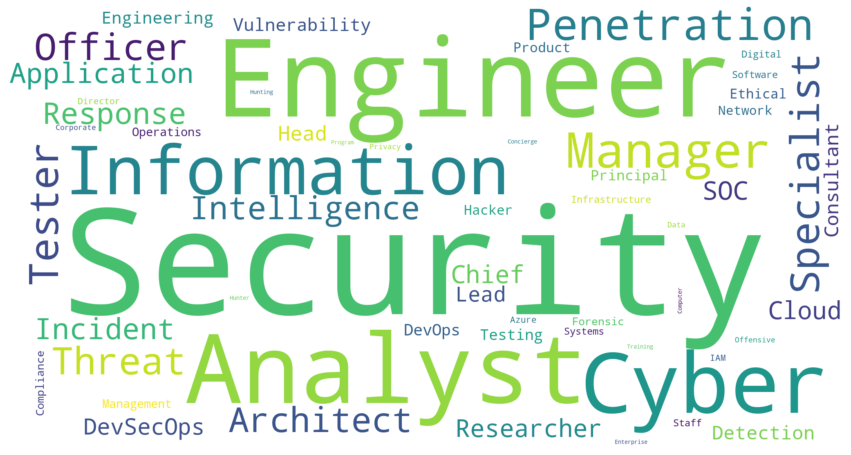

In [ ]:
text1 = " ".join(title for title in df.job_title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white', width = 2048, height = 1080).generate(text1)
plt.figure(figsize=[15,10])
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

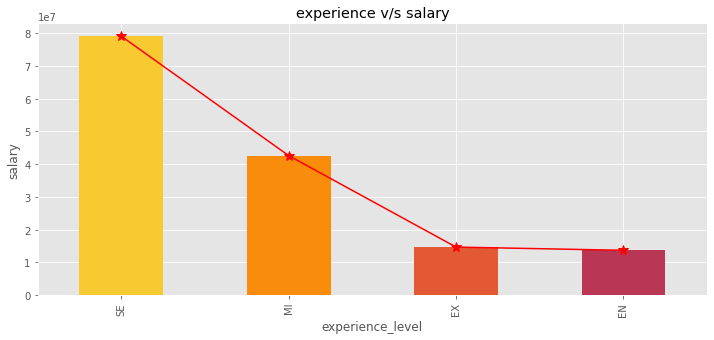

In [ ]:
plt.figure(figsize=(12,5))
plt.title('experience v/s salary')
plt.ylabel('salary')
df.groupby('experience_level')['salary_in_usd'].sum().sort_values(ascending=False)[0:15].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('experience_level')['salary_in_usd'].sum().sort_values(ascending=False)[0:15].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

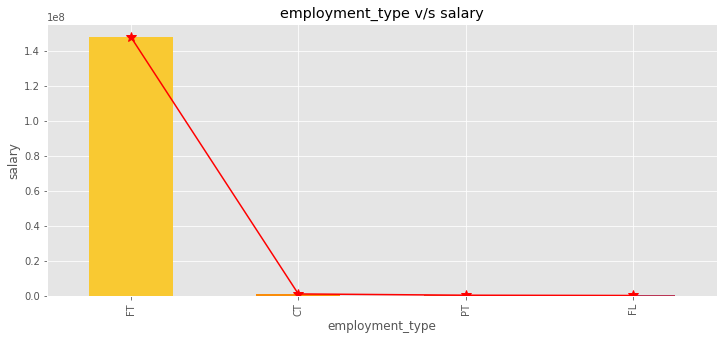

In [ ]:
plt.figure(figsize=(12,5))
plt.title('employment_type v/s salary')
plt.ylabel('salary')
df.groupby('employment_type')['salary_in_usd'].sum().sort_values(ascending=False)[0:15].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('employment_type')['salary_in_usd'].sum().sort_values(ascending=False)[0:15].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

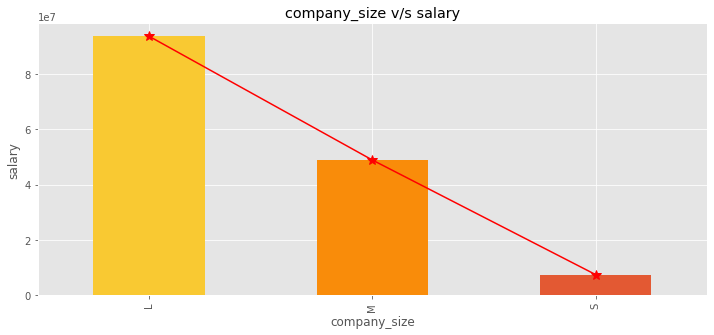

In [ ]:
plt.figure(figsize=(12,5))
plt.title('company_size v/s salary')
plt.ylabel('salary')
df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending=False)[0:15].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending=False)[0:15].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## Show salaries distribution by Job Title


In [ ]:
g1 = px.treemap(df, path=['job_title', 'salary_in_usd'])
g1.show()

## Show salaries and proportion of Remote Jobs

In [ ]:
g2 = px.treemap(df, path=['remote_ratio', 'salary_in_usd'])
g2.show()

## Show the evolution of Remote Jobs over the Years

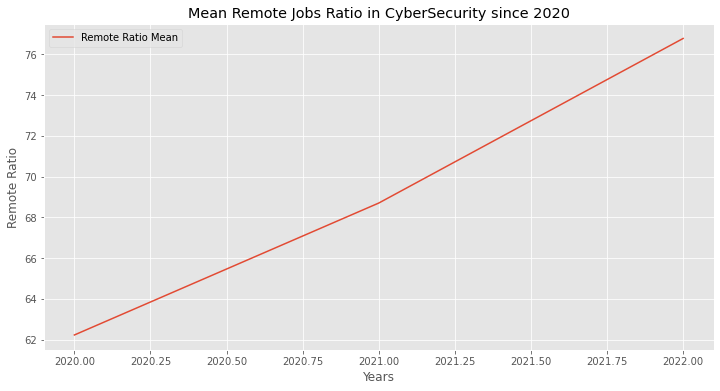

In [ ]:
handling_data = df.loc[:,['work_year', 'remote_ratio']]
mean_remote2020 = handling_data.loc[handling_data["work_year"] == 2020]["remote_ratio"].mean()
mean_remote2021 = handling_data.loc[handling_data["work_year"] == 2021]["remote_ratio"].mean()
mean_remote2022 = handling_data.loc[handling_data["work_year"] == 2022]["remote_ratio"].mean()
means = [mean_remote2020, mean_remote2021, mean_remote2022]
years = ["2020", "2021", "2022"]

df_plot = pd.DataFrame(data = means, index = years, columns= ["Remote Ratio Mean"])
df_plot.index = df_plot.index.map(int) # let's change the index values of Years to type integer for plotting
df_plot.plot(kind='line', figsize=(12,6))

plt.title(f'Mean Remote Jobs Ratio in CyberSecurity since 2020')
plt.ylabel('Remote Ratio')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

In [ ]:
g3 = px.parallel_categories(df, dimensions=['work_year', 'remote_ratio'])
g3.show()

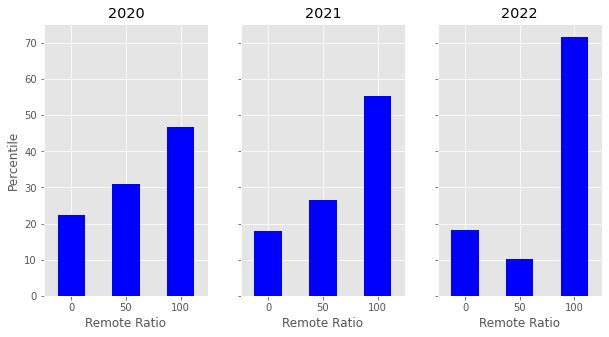

In [ ]:
i = 0
figure, axis = plt.subplots(1, 3, sharey = True, figsize = (10,5))

for year in np.sort(df['work_year'].unique()):
    temp = df.loc[df['work_year'] == year]['remote_ratio']
    temp = temp.value_counts()/temp.value_counts().sum()*100
    
    temp.sort_index().plot(ax = axis[i], subplots = True, kind ='bar', grid = True,color='blue')
    axis[i].set_xlabel('Remote Ratio')  
    axis[i].set_ylabel('Percentile')
    axis[i].set_title(f'{year}')
    axis[i].set_xticklabels([0, 50, 100], rotation=0)
    
    i += 1

plt.show()   

## Remote Job Ratio in each of this companies since 2020

In [ ]:
g4 = px.treemap(df, path=['work_year', 'company_size', 'remote_ratio'])
g4.show()

In [ ]:
g5 = px.treemap(df, path=['company_location', 'employee_residence', 'remote_ratio'])
g5.show()

In [ ]:
g6 = px.treemap(df, path=['company_size', 'company_location'])
g6.show()

# Univaraint Analysis

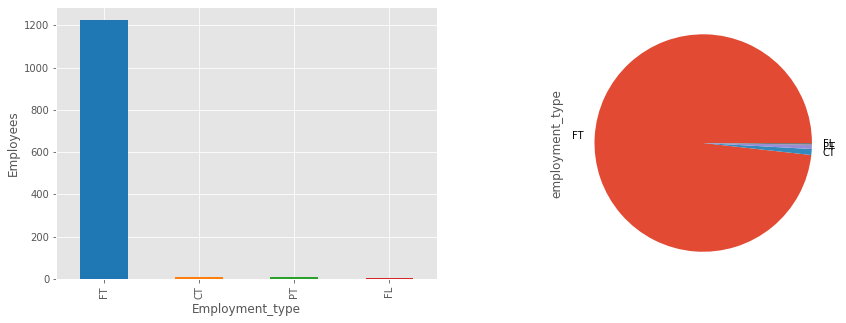

In [ ]:
#types of Employee

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['employment_type'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.xlabel("Employment_type")
plt.ylabel("Employees")
plt.subplot(1,2,2)
df['employment_type'].value_counts().plot(kind='pie')
plt.show()

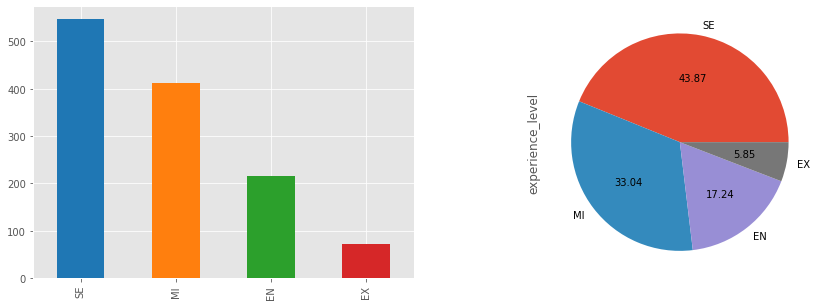

In [ ]:
#level of Exprince
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['experience_level'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
df['experience_level'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

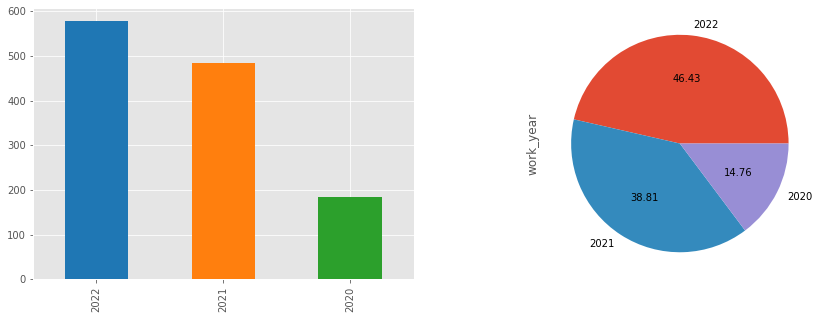

In [ ]:
#employees in every year
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['work_year'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
df['work_year'].value_counts().plot(kind='pie',autopct="%.2f")

plt.show()

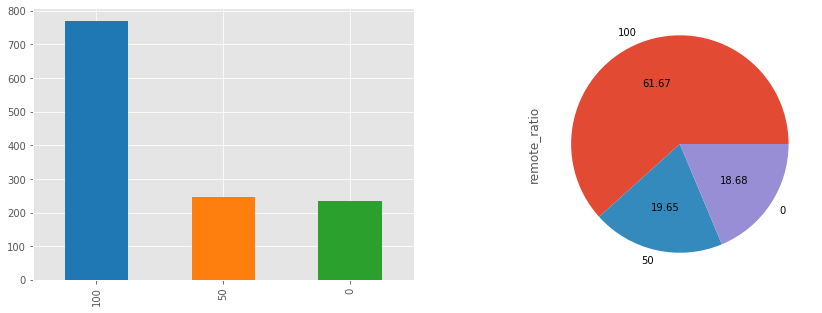

In [ ]:
#remote ratio
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['remote_ratio'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
df['remote_ratio'].value_counts().plot(kind='pie',autopct="%.2f")

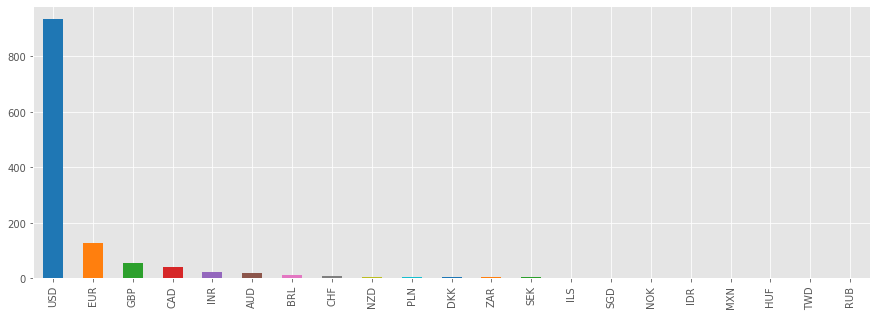

In [ ]:
#company size
plt.figure(figsize=(15,5))
df['salary_currency'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))


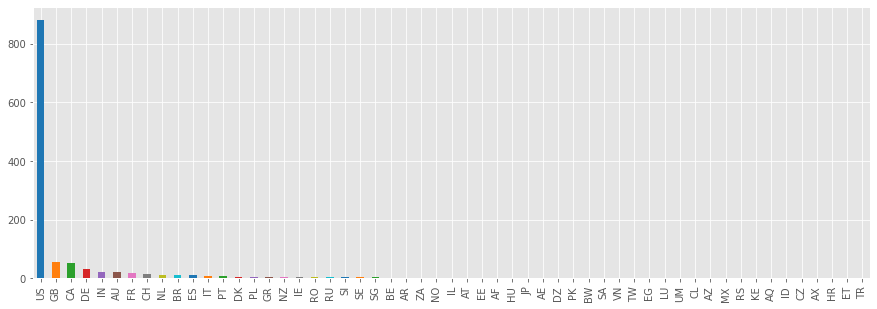

In [ ]:
plt.figure(figsize=(15,5))
df['company_location'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

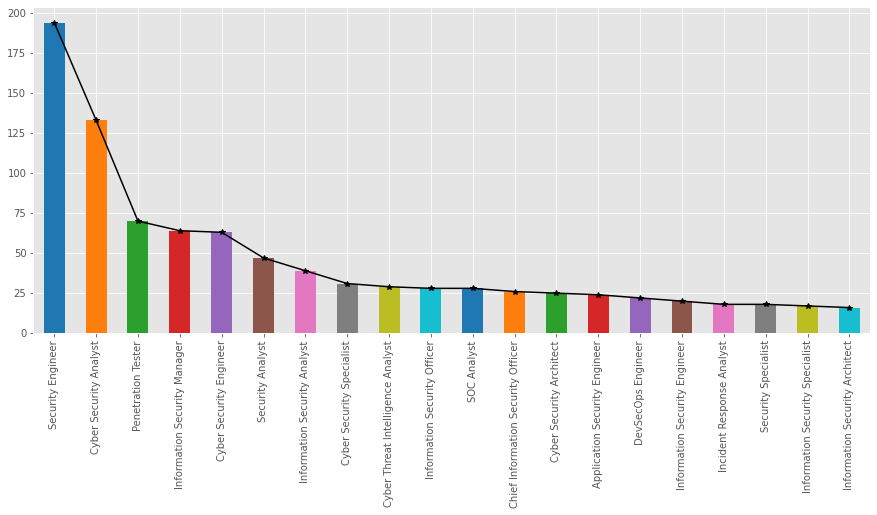

In [ ]:
plt.figure(figsize=(15,6))
df['job_title'].value_counts()[:20].plot(kind='line',color='black',marker="*")
df['job_title'].value_counts()[:20].plot(kind='bar',color=sns.color_palette("tab10"))

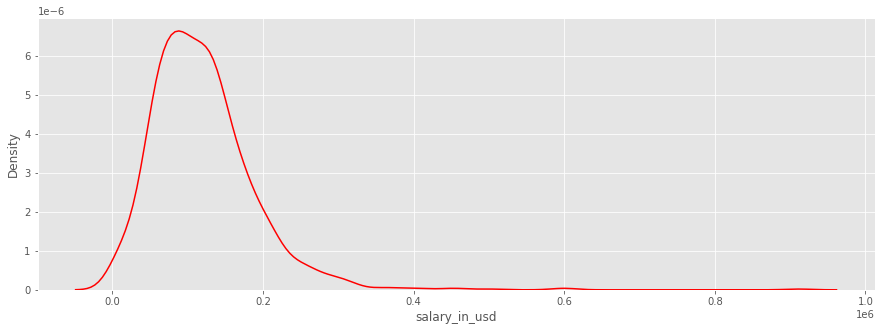

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['salary_in_usd'],hist=False,color='red')

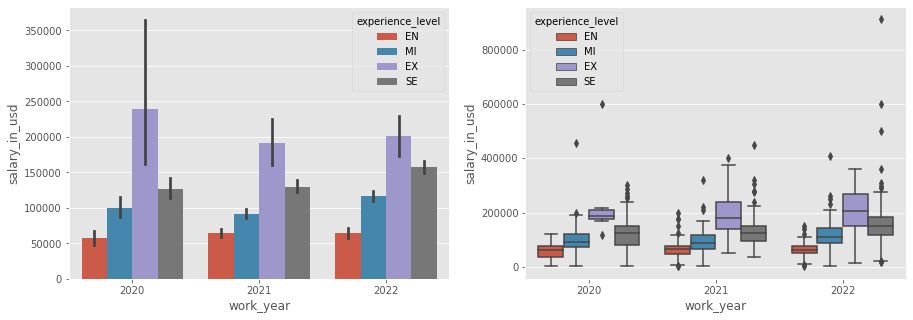

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['experience_level'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['experience_level'])
plt.show()
plt.show()

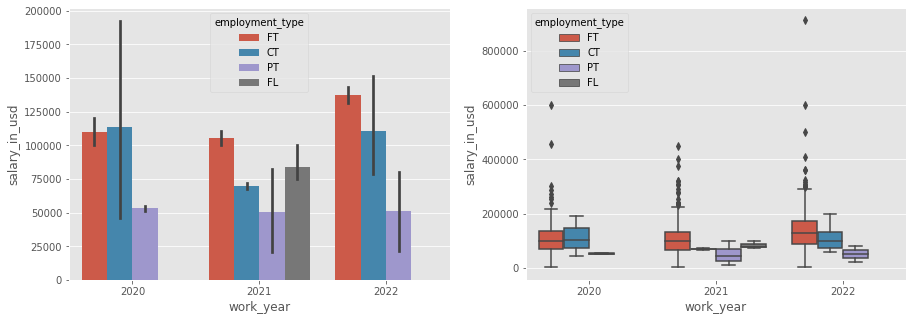

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['employment_type'])
plt.show()

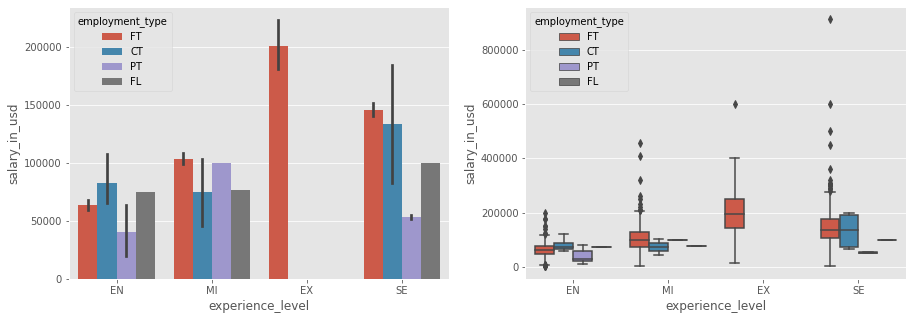

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['experience_level'],df['salary_in_usd'],hue=df['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(df['experience_level'],df['salary_in_usd'],hue=df['employment_type'])
plt.show()

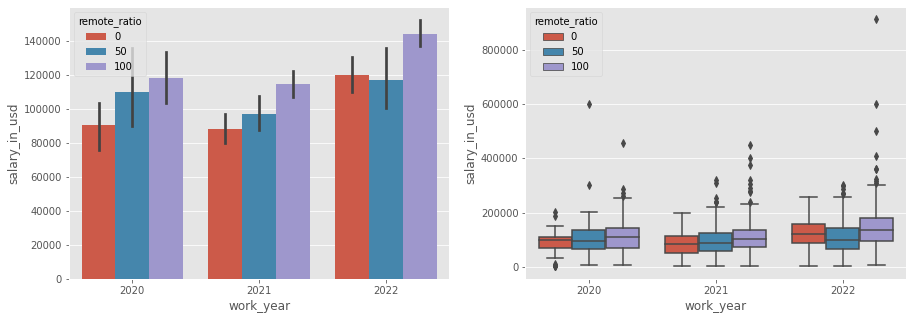

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['remote_ratio'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['remote_ratio'])
plt.show()

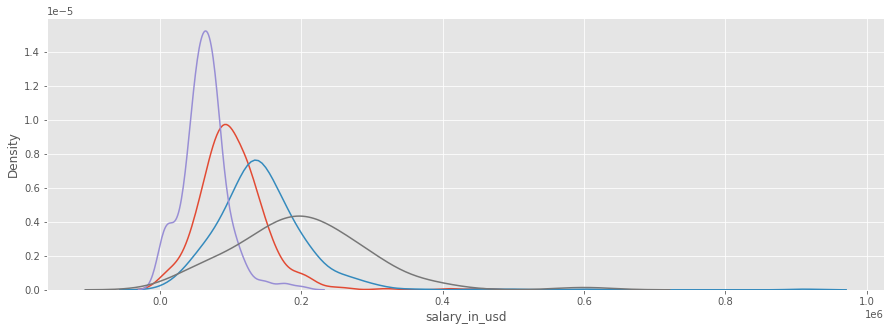

In [ ]:
#salary depend on exprience
plt.figure(figsize=(15,5))
sns.distplot(df[df['experience_level']=="MI"]['salary_in_usd'],hist=False)
sns.distplot(df[df['experience_level']=="SE"]['salary_in_usd'],hist=False)
sns.distplot(df[df['experience_level']=="EN"]['salary_in_usd'],hist=False)
sns.distplot(df[df['experience_level']=="EX"]['salary_in_usd'],hist=False)

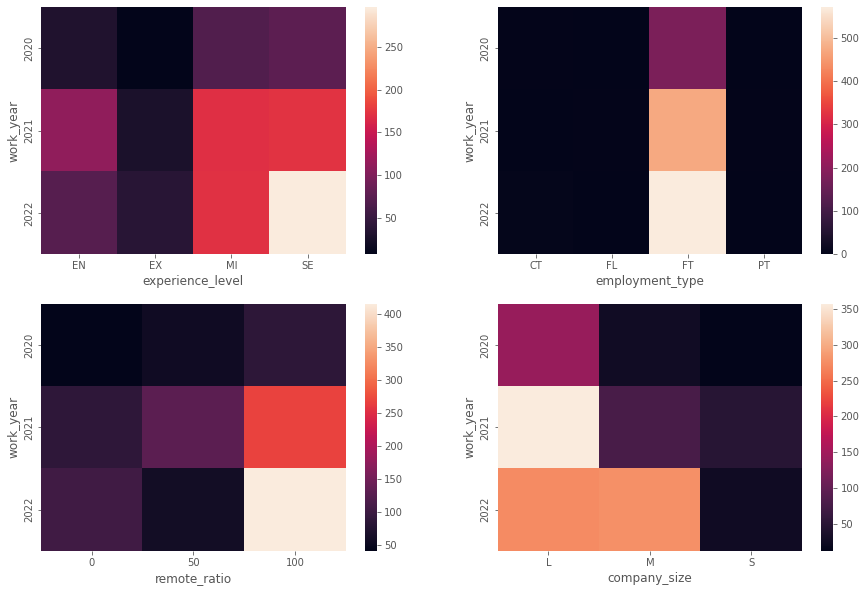

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
#experience level by year
sns.heatmap(pd.crosstab(df['work_year'],df['experience_level']))
plt.subplot(2,2,2)
#employement_type by year
#FT employee is more in every year
sns.heatmap(pd.crosstab(df['work_year'],df['employment_type']))
plt.subplot(2,2,3)
#remote_ratio by year
sns.heatmap(pd.crosstab(df['work_year'],df['remote_ratio']))
plt.subplot(2,2,4)
#size of companies by year
sns.heatmap(pd.crosstab(df['work_year'],df['company_size']))

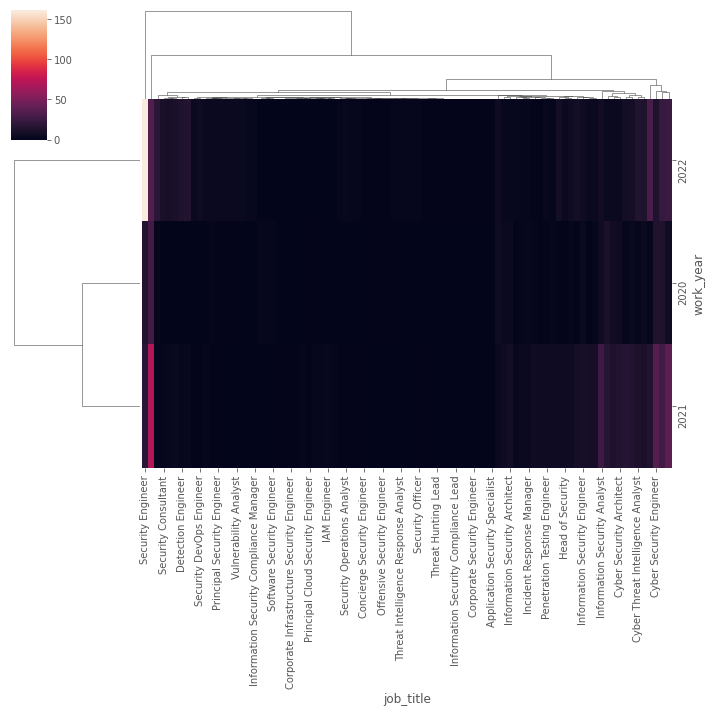

In [ ]:
sns.clustermap(pd.crosstab(df['work_year'],df['job_title']))

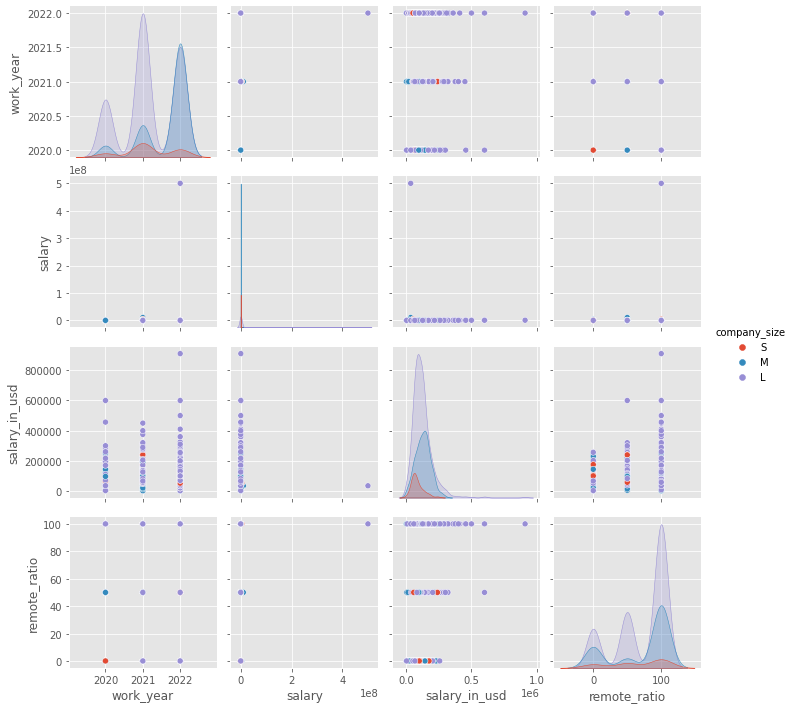

In [ ]:
sns.pairplot(df,hue='company_size')
